In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

column_names = ['area', 'perimeter', 'compactness', 'length_kernel',
                'width_kernel', 'asymmetry_coef', 'length_groove', 'target']

df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/seeds_dataset.txt", sep='\t+', engine='python', names=column_names)

df.head()

,area,perimeter,compactness,length_kernel,width_kernel,asymmetry_coef,length_groove,target
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [4]:
# 컬렴명 확인
df.columns

Index(['area', 'perimeter', 'compactness', 'length_kernel', 'width_kernel',
       'asymmetry_coef', 'length_groove', 'target'],
      dtype='object')

In [5]:
# 결측치 확인
df.isnull().sum()

,0
area,0
perimeter,0
compactness,0
length_kernel,0
width_kernel,0
asymmetry_coef,0
length_groove,0
target,0


In [6]:
df['target'].value_counts()

,count
target,
1,70
2,70
3,70


In [7]:
X=df.drop('target',axis=1)
X.head()

,area,perimeter,compactness,length_kernel,width_kernel,asymmetry_coef,length_groove
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175


In [8]:
y=df['target']
y.value_counts()

,count
target,
1,70
2,70
3,70


In [9]:
from tensorflow.keras.utils import to_categorical

Y = to_categorical(y)

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [11]:
X_train.shape,X_test.shape, y_train.shape, y_test.shape

((168, 7), (42, 7), (168, 4), (42, 4))

In [12]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [19]:
#Defining the model

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam


model = Sequential()

model.add(Dense(64,input_shape=(7,),activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(4,activation='softmax'))


model.compile(optimizer='adam',
              loss="binary_crossentropy",
              metrics=['accuracy'])
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 64)             │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 4)              │            68 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,188 (12.45 KB)

 Trainable params: 3,188 (12.45 KB)

 Non-trainable params: 0 (0.00 B)

In [20]:
model_history=model.fit(x=X_train, y=y_train, epochs=30, batch_size=32,validation_split=0.1)
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 70ms/step - accuracy: 0.3833 - loss: 0.6633 - val_accuracy: 0.5882 - val_loss: 0.6377
Epoch 2/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6690 - loss: 0.6191 - val_accuracy: 0.7647 - val_loss: 0.5939
Epoch 3/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8329 - loss: 0.5757 - val_accuracy: 0.9412 - val_loss: 0.5514
Epoch 4/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9183 - loss: 0.5274 - val_accuracy: 0.8235 - val_loss: 0.5083
Epoch 5/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.8805 - loss: 0.4815 - val_accuracy: 0.8235 - val_loss: 0.4644
Epoch 6/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.9113 - loss: 0.4285 - val_accuracy: 0.8235 - val_loss: 0.4219
Epoch 7/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8735 - loss: 0.3932 - val_accuracy: 0.8235 - val_loss: 0.3830
Epoch 8/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.8604 - loss: 0.3559 - val_accuracy: 0.8235 - val_loss: 0.3488


1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


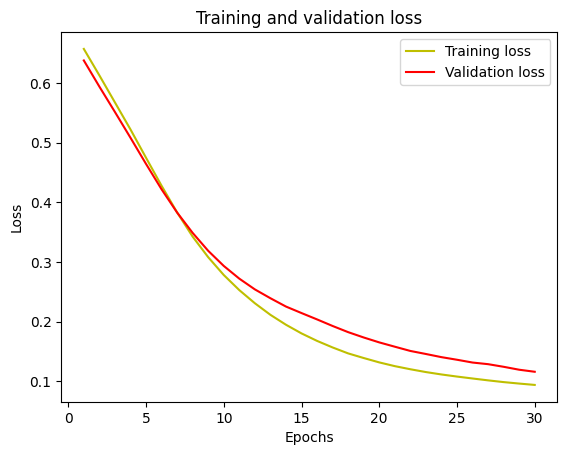

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

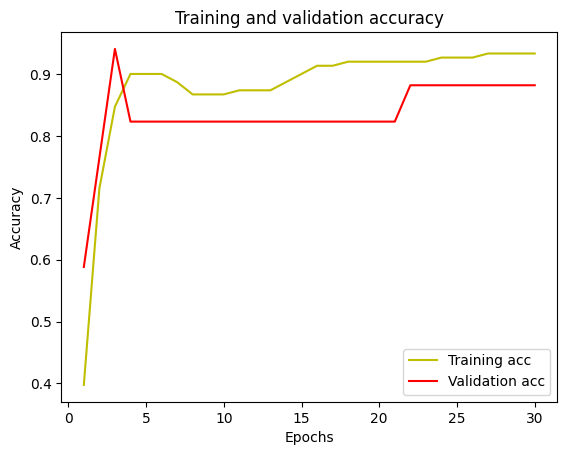

In [23]:
acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [24]:
#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           1       0.85      0.85      0.85        13
           2       0.93      0.88      0.90        16
           3       0.93      1.00      0.96        13

    accuracy                           0.90        42
   macro avg       0.90      0.91      0.90        42
weighted avg       0.90      0.90      0.90        42

[[11  1  1]
 [ 2 14  0]
 [ 0  0 13]]
